# Pipelines and Hyperparameter Tuning


### In this assignment, you will be putting together everything you have learned so far. You will need to find your own dataset, do all the appropriate preprocessing, test different supervised learning models and evaluate the results. More details for each step can be found below.

### You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.


### Import Libraries


In [40]:
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

## Step 1: Data Input

Import the dataset you will be using. You can download the dataset onto your computer and read it in using pandas, or download it directly from the website. Answer the questions below about the dataset you selected.

To find a dataset, you can use the resources listed in the notes. The dataset can be numerical, categorical, text-based or mixed. If you want help finding a particular dataset related to your interests, please email the instructor.

**You cannot use a dataset that was used for a previous assignment or in class**


In [41]:
# Import dataset
# Data Source: https://www.kaggle.com/datasets/yekenot/tree-survival-prediction
# kaggle datasets download -d yekenot/tree-survival-prediction
df = pd.read_csv("./data/pipelines_dataset.csv")

#### Detailed information about each column follows:

No: Seedling unique ID number.

Plot: Number of the field plot the seedling was planted in. (1-18)

Subplot: Subplot within the main plot the seedling was planted in. Broken into 5 subplots (1 per corner, plus 1 in the middle). (A-E)

Species: Includes Acer saccharum, Prunus serotina, Quercus alba, and Quercus rubra.

Light ISF: Light level quantified with HemiView software. Represents the amount of light reaching each subplot at a height of 1m.

Light Cat: Categorical light level created by splitting the range of Light_ISF values into three bins (low, med, high).

Core: Year the soil core was removed from the field.

Soil: Species from which the soil core was taken. Includes all species, plus Acer rubrum, Populus grandidentata, and a sterilized conspecific for each species.

Adult: Individual tree that soil was taken from. Up to 6 adults per species. Used as a random effect in analyses.

Sterile: Whether the soil was sterilized or not.

Conspecific: Whether the soil was conspecific, heterospecific, or sterilized conspecific.

Myco: Mycorrhizal type of the seedling species (AMF or EMF).

SoilMyco: Mycorrhizal type of the species culturing the soil (AMF or EMF).

PlantDate: The date that seedlings were planted in the field pots.

AMF: Percent arbuscular mycorrhizal fungi colonization on the fine roots of harvested seedlings.

EMF: Percent ectomycorrhizal fungi colonization on the root tips of harvested seedlings.

Phenolics: Calculated as nmol Gallic acid equivalents per mg dry extract (see manuscript for detailed methods)

NSC: Calculated as percent dry mass nonstructural carbohydrates (see manuscript for detailed methods)

Lignin: Calculated as percent dry mass lignin (see manuscript for detailed methods)

Census: The census number at which time the seedling died or was harvested.

Time: The number of days at which time the seedling died or was harvested.

Event: Used for survival analysis to indicate status of each individual seedling at a given time (above)

0 = harvested or experiment ended

1 = dead

Harvest: Indicates whether the seedling was harvested for trait measurement.

Alive: Indicates if the seedling was alive at the end of the second growing season. "X" in this field indicates alive status.

Missing data is coded as NA.


### Questions

1. What is the source of your dataset?
1. Why did you pick this particular dataset?
1. Was there anything challenging about finding a dataset that you wanted to use?


_Answers_

1. The dataset is from Kaggle.com - Tree Survival Prediction (https://www.kaggle.com/datasets/yekenot/tree-survival-prediction)

Wood, Katherine; Kobe, Richard; Ibáñez, Inés; McCarthy-Neumann, Sarah (2023). Tree seedling functional traits mediate plant-soil feedback survival responses across a gradient of light availability [Dataset]. Dryad. https://doi.org/10.5061/dryad.xd2547dpw

1. I picked this dataset as it has a reasonable size (23 features, 2783 rows) and the data includes heterogenous data (numerical data as well as categorical data) that seemed to be a good candidate for using column transformer.

1. There were a lot of very small datasets or sets that had already seen a lot of preprocessing that had essentially already been scaled and encoded to columns of binary data.


## Step 2: Data Processing

The next step is to process your data. Implement the following steps as needed.


In [42]:
print("The size of the dataset is:", df.shape)

The size of the dataset is: (2783, 24)


In [43]:
# View first 5 rows of the data
df.head()

,No,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,...,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event,Harvest,Alive
0,126,1,C,Acer saccharum,0.106,Med,2017,Prunus serotina,I,Non-Sterile,...,22.00,NaN,-0.56,13.86,12.15,4,14.0,1.0,NaN,NaN
1,11,1,C,Quercus alba,0.106,Med,2017,Quercus rubra,970,Non-Sterile,...,15.82,31.07,5.19,20.52,19.29,33,115.5,0.0,NaN,X
2,12,1,C,Quercus rubra,0.106,Med,2017,Prunus serotina,J,Non-Sterile,...,24.45,28.19,3.36,24.74,15.01,18,63.0,1.0,NaN,NaN
3,2823,7,D,Acer saccharum,0.080,Med,2016,Prunus serotina,J,Non-Sterile,...,22.23,NaN,-0.71,14.29,12.36,4,14.0,1.0,NaN,NaN
4,5679,14,A,Acer saccharum,0.060,Low,2017,Prunus serotina,689,Non-Sterile,...,21.15,NaN,-0.58,10.85,11.20,4,14.0,1.0,NaN,NaN


#### Clean data


In [44]:
# Clean data (if needed)

In [45]:
# Check for null values
df.isnull().sum()

No                0
Plot              0
Subplot           0
Species           0
Light_ISF         0
Light_Cat         0
Core              0
Soil              0
Adult             0
Sterile           0
Conspecific       0
Myco              0
SoilMyco          0
PlantDate         0
AMF               0
EMF            1500
Phenolics         0
Lignin            0
NSC               0
Census            0
Time              0
Event             1
Harvest        2079
Alive          2292
dtype: int64

In [46]:
# Fill all missing values with zeros
df = df.fillna(0)

# Replace X with 1
df.replace('X', 1, inplace=True)

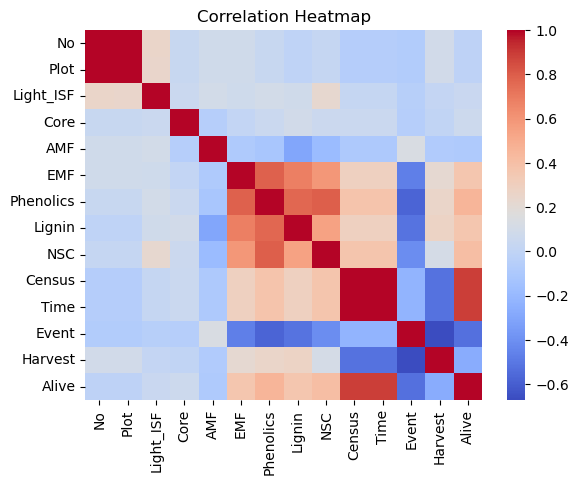

In [47]:
# Visualize the correlation between numerical variables with a heatmap
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
# The plot shows that there is strong correlation between 'No' and 'Plot' features.
# Drop the 'No' column to reduce the number of features to consider in the machine learning model.

In [48]:
# View column info to determine if other cleaning is needed to extract numeric data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2783 entries, 0 to 2782
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No           2783 non-null   int64  
 1   Plot         2783 non-null   int64  
 2   Subplot      2783 non-null   object 
 3   Species      2783 non-null   object 
 4   Light_ISF    2783 non-null   float64
 5   Light_Cat    2783 non-null   object 
 6   Core         2783 non-null   int64  
 7   Soil         2783 non-null   object 
 8   Adult        2783 non-null   object 
 9   Sterile      2783 non-null   object 
 10  Conspecific  2783 non-null   object 
 11  Myco         2783 non-null   object 
 12  SoilMyco     2783 non-null   object 
 13  PlantDate    2783 non-null   object 
 14  AMF          2783 non-null   float64
 15  EMF          2783 non-null   float64
 16  Phenolics    2783 non-null   float64
 17  Lignin       2783 non-null   float64
 18  NSC          2783 non-null   float64
 19  Census

In [49]:
# Define 'X' and 'y'
# 'X' contains all features except 'Alive' and 'No'
X = df.drop(columns=['Alive', 'No'])
y = df['Alive']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [50]:
# Implement preprocessing steps. Remember to use ColumnTransformer if more than one preprocessing method is needed

# Define numeric and categorical features
numeric_features = ["Light_ISF", "AMF", "EMF",
                    "Phenolics", "Lignin", "NSC", "Census", "Time"]
categorical_features = ["Plot", "Subplot", "Species", "Light_Cat", "Core",
                        "Soil", "Sterile", "Conspecific", "Myco", "SoilMyco", "Harvest", "Event"]


# Create the transformers
numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())]
)
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
        ("selector", SelectPercentile(chi2, percentile=50)),
    ]
)

# Create the preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

### Questions

1. Were there any missing/null values in your dataset? If yes, how did you replace them and why? If no, describe how you would've replaced them and why.
2. What type of data do you have? What preprocessing methods would you have to apply based on your data types?


_Answers_

1. There were missing/null values in the dataset. Filling the missing values for EMF with 0 makes the most sense as the missing values indicate that there is no presence of the fungi. For Harvest and Alive we can fill the missing values with zero and change the existing values "X" to 1 to indicate that either the tree was harvested during or was still alive at the end of the study.

1. There is numeric and categorical (both integer and string) data. Preprocessing included OneHotEncoding (categorical data, transforms categorical number or string categories into columns containing 1 or 0) and StandardScaler (numeric data, scaled to ensure mean is 0 with a variance of 1).


## Step 3: Implement Machine Learning Model

In this section, you will implement three different supervised learning models (one linear and two non-linear) of your choice. You will use a pipeline to help you decide which model and hyperparameters work best. It is up to you to select what models to use and what hyperparameters to test. You can use the class examples for guidance. You must print out the best model parameters and results after the grid search.


In [51]:
# Implement pipeline and grid search here. Can add more code blocks if necessary

#### Implement Pipeline


In [52]:
# Create pipelines for each classifier
# logistic regression, linear
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=0))
])

# random forest, non-linear
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=0))
])

# gradient boosting, non-linear
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=0))
])

In [53]:
# Determine if data is imablanced to find out if F1 score appropriate
print("Number of alive trees in the dataset:", df['Alive'].sum())
# the classes are imbalanced, 491 alive trees in 2783 total trees. F1 score is needed to make sure we aren't just guessing that the tree isn't alive.

Number of alive trees in the dataset: 491


In [54]:
# Define the scoring metrics you want to use
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_score': make_scorer(f1_score)
}

#### Implement Grid Search


In [55]:
# Define parameter grids
param_grid_lr = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10]
}
param_grid_rf = {
    'classifier__n_estimators': [5, 10, 50, 100, 200],
    'classifier__max_depth': [1, 3, 5]
}
param_grid_gb = {
    'classifier__n_estimators': [5, 10, 50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'classifier__max_depth': [1, 3, 5]
}

# Create GridSearchCV instances for each algorithm with multiple scoring metrics
grid_lr = GridSearchCV(lr_pipeline, param_grid_lr, cv=5,
                       scoring=scoring, refit='f1_score')
grid_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=5,
                       scoring=scoring, refit='f1_score')
grid_gb = GridSearchCV(gb_pipeline, param_grid_gb, cv=5,
                       scoring=scoring, refit='f1_score')

#### Fit the models


In [56]:
# Fit the models using training data
grid_lr.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)
grid_gb.fit(X_train, y_train)

# Access the results for both scoring metrics
results_lr = grid_lr.cv_results_
results_rf = grid_rf.cv_results_
results_gb = grid_gb.cv_results_

# Get the best parameters based on F1
best_params_lr = grid_lr.best_params_
best_params_rf = grid_rf.best_params_
best_params_gb = grid_gb.best_params_

# Print the results for accuracy and F1
print("Logistic Regression Results:")
print("Best Parameters for Logistic Regression based on F1:", best_params_lr)
print("Training Score based on Best Parameters: ",
      grid_lr.best_estimator_.score(X_train, y_train))
print("Average F1 score: ", results_lr['mean_test_f1_score'].mean())

print("\nRandom Forest Results:")
print("Best Parameters for Random Forest based on F1:", best_params_rf)
print("Training Score based on Best Parameters: ",
      grid_rf.best_estimator_.score(X_train, y_train))
print("Average F1 score: ", results_rf['mean_test_f1_score'].mean())

print("\nGradient Boosting Results:")
print("Best Parameters for Gradient Boosting based on F1:", best_params_gb)
print("Training Score based on Best Parameters: ",
      grid_gb.best_estimator_.score(X_train, y_train))
print("Average F1 score: ", results_gb['mean_test_f1_score'].mean())

Logistic Regression Results:
Best Parameters for Logistic Regression based on F1: {'classifier__C': 0.01}
Training Score based on Best Parameters:  1.0
Average F1 score:  0.9485477822809848

Random Forest Results:
Best Parameters for Random Forest based on F1: {'classifier__max_depth': 3, 'classifier__n_estimators': 10}
Training Score based on Best Parameters:  0.9994866529774127
Average F1 score:  0.8188459788784003

Gradient Boosting Results:
Best Parameters for Gradient Boosting based on F1: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 1, 'classifier__n_estimators': 50}
Training Score based on Best Parameters:  0.9994866529774127
Average F1 score:  0.8987050359712231


### Questions

1. Do you need regression or classification models for your dataset?
1. Which models did you select for testing and why?
1. Which model worked the best? Does this make sense based on the theory discussed in the course and the context of your dataset?


_Answers_

1. A classification model is needed for this dataset - predicting whether or not a tree is alive can only have two classes - alive or not with no gradient between them.

1. I selected LogisticRegression, RandomForestClassifier, and GradientBoostingClassifier to span the linear/non-linear requirements but also to build models of varying complexity (lowest complexity being logitistic regression and highest complexity being gradient boosting classifier) and to allow multiple paramters to be tuned in the grid search.

1. The LogisticRegression model worked the best in that it has the highest average F1 score and training score. This means the LogisticRegression model had the highest number of correct predictions across the entire dataset relative to Random Forest and Gradient Boosted trees. All models performed about the same when looking at the accuracy score for the best parameters coming from the pipeline. This makes sense based on the theory discussed in the course as the dataset is quite small and the tree models may be more complex than is needed to model the relationship between the features. The relationship between the features may also be linear and thus best represented by the linear model.


## Step 4: Validate Model

Use the testing set to calculate the testing accuracy for the best model determined in Step 3.


In [58]:
# Calculate testing accuracy

# Get best model
best_model = grid_lr.best_estimator_

# Predictions on the testing set
y_pred = best_model.predict(X_test)

# Evaluate accuracy
testing_accuracy = accuracy_score(y_test, y_pred)

print("Testing Accuracy of the Best Model: {:.3f}".format(testing_accuracy))

Testing Accuracy of the Best Model: 0.999


### Questions

1. Which accuracy metric did you choose?
1. How do these results compare to those in part 3? Did this model generalize well?
1. Based on your results and the context of your dataset, did the best model perform "well enough" to be used out in the real-world? Why or why not? Do you have any suggestions for how you could improve this analysis?

_ANSWER HERE_


1. Used accuracy*score to validate the model and F1 score to determine which model is the best. Chose accuracy_score as the accuracy metric and accessed the best_estimator* model to predict based on the X_test values and compare to the y_test values. An F1 score is needed as the classes are imbalanced (491 alive trees in 2783 total trees) to make sure we aren't just guessing the negative class. The F1 score computes how many times the model made a correct prediction across the entire dataset.

1. These results do compare to the results from the training set as all three models performed extremely well using the training data and the .score() method. The linear regression model performed best followed by the gradient boosting model and then the random forest model. This makes the most sense in that the logistic regression model has the fewest number of hyperparameters to fine-tune and it may be possible that the data has a somewhat linear relationship. The model did generalize well to new data as we recieved a score fo 0.999 on the new data.

1. Based on the data, I would say this model performs well enough to be used in the real-world. Predicting if trees are alive is not critical to human life so the presence of false positive or false negative predictions don't carry much moral or ethical weight. There are likely many other factors that directly impact the lifespan of a tree that would prevent any model from perfectly predicting if a tree is alive or not. To improve the analysis we could add more features that would have weight on the prediction of the life of a tree.


## Process Description

Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:

1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?


_DESCRIBE YOUR PROCESS HERE_


1. From the textbook (Introduction to Machine Learning with Python), class and lab examples.

1. Completed the steps the order data cleaning, preprocessing using column transformer with StandardScaler and OneHotEncoder, created a pipline, and implemented grid search. I went back to add the heatmap of all of my numeric variables to see if there was anything else I could learn from the data. There was a strong correlation between the 'No' and 'Plot' column so I dropped the No column from the dataset. It also appears as though there is correlation between whether or not a tree is alive and the age of the tree (large 'Time' value). I ultimately tested the models when including the 'Census' and 'Time' features but I did explore whether or not to drop the columns thinking they may be too correlated to provide an accurate model. I did not drop the columns as when I did so the accuracy score for all three models was 1.0 but the F1 score was much lower (0.77, 0.65, and 0.79 for Logisitic Regression, Random Forest, and Gradient Boosted).

1. Used generative AI to check my work. I keep getting the testing accuracy of 1.0 for all models despite the training mean_test_accuracy and f1_scores being lower than 0.999. I asked ChatGPT to tell me if I had a data leak. It said no data leak and suggested applying preprocessor.transform(X_test). This is an incorrect suggestion as the testing data does not need to be transformed or preprocessed. The test data is put into the finished model and a class is suggested based on the model, not based on changing the test data.

1. Challenges: same as above... my testing score is a perfect 1.0 for all three models despite the training data telling me that the results might show otherwise. Changing the test_size in train_test_split allowed a very high accuracy score that was not a perfect value. I was also challenged on how / when to determine if features are too correlated and when to drop those features from the dataset.
